In [ ]:
!pip install stable-baselines3[extra] gym[atari] opencv-python # ale-py atari_py #for V4

In [ ]:
# for autoformatting
#%load_ext jupyter_black

In [ ]:
!apt-get update && apt-get install swig cmake
#!pip install box2d-py #for box2d games like lunarlander

In [ ]:
!pip install gwpy --quiet #for quiet outputs

In [ ]:
# matplot
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import gym
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack

# Replace 'MsPacmanNoFrameskip-v4' with 'MsPacman-v0' for the MsPacman environment
env_id = "MsPacman-v0"
env = make_atari_env(env_id, n_envs=1, seed=0)

# Stack 4 frames together to give context
env = VecFrameStack(env, n_stack=4)

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment MsPacman-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


In [ ]:
from stable_baselines3 import DQN

model = DQN("CnnPolicy", env, verbose=1,
            learning_rate=1e-4,
            buffer_size=50000,
            learning_starts=10000,
            batch_size=32,
            tau=1.0,
            gamma=0.99,
            train_freq=4,
            gradient_steps=1,
            target_update_interval=10000,
            exploration_fraction=0.1,
            exploration_final_eps=0.01,
            policy_kwargs=dict(net_arch=[256]),
            tensorboard_log="./dqn_mspacman_tensorboard/")


Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the agent
model.learn(total_timesteps=int(1e5))
# Save the agent
model.save("dqn_pacman")

Action space: Discrete(9)
Observation space: Box(0, 255, (84, 84, 4), uint8)


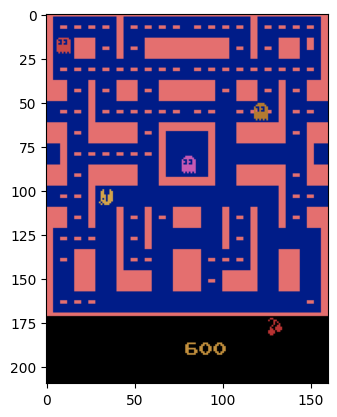

In [ ]:
plt.imshow(env.render('rgb_array'))
plt.grid(False)
print("Action space:", env.action_space)
print("Observation space:", env.observation_space)

In [ ]:
import time

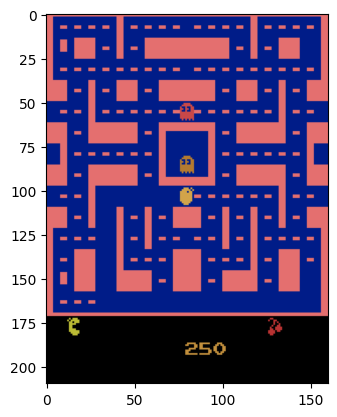

In [ ]:
# Evaluate Model

obs = env.reset()
#for i in range(10):
action, _states = model.predict(obs, deterministic=True)
obs, rewards, dones, info = env.step(action)
plt.imshow(env.render('rgb_array'))
plt.grid(False)
#time.sleep(3)
#env.close()

In [ ]:
print(obs.shape)
print(obs.dtype)

(1, 84, 84, 4)
uint8


In [ ]:
!pip install onnx

In [ ]:
import torch
# export model out as Onnx

obs = env.reset()
policy = model.policy
q_network = policy.q_net  # Access the Q-network directly

# Move the dummy input to the same GPU
dummy_input = torch.randn(1, 4, 84, 84).to('cuda')  # Batch size of 1

torch.onnx.export(
    q_network,
    dummy_input,
    "dqn_pacman.onnx",
    export_params=True,
    opset_version=11,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
  )